# Sprint20課題 セグメンテーション

## 1.この課題の目的
- セグメンテーションを行う

## 2.セグメンテーション
地表面下にある塩分堆積物のセグメンテーションを行う。KaggleのTGS Salt Identification Challengeのデータセットを使用する。

[TGS Salt Identification Challenge | Kaggle](https://www.kaggle.com/c/tgs-salt-identification-challenge)

セグメンテーション手法としてU-Net[1]を使う。

[1]O.Ronneberger, P.Fischer, T.Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015

https://arxiv.org/pdf/1505.04597.pdf

### 【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行う。

[zhixuhao/unet: unet for image segmentation](https://github.com/zhixuhao/unet)

<font color="navy">**GPU環境での学習**</font>

大規模なデータセット、大きなモデルになるため、GPUを使用する必要がある。

<font color="navy">**新たなデータセットの適用**</font>

Sprint18,19と同様に実装で用意されたものとは異なるデータセットを入力する。

###  Kaggleコンペティションのバックグラウンド

- 今回のコンペは、TGS（世界有数のgeoscience data company）が主催したもの。

- 石油やガスが大量に蓄積されている地域では地表面下に巨大な塩の堆積物があるが、塩の堆積物の位置情報を知ることは非常に困難。

- 地震波イメージング（seismic imaging）における塩体の特定は熟練者による解釈（＝非常に主観的）を必要としており、レンダリング（コンピュータープログラムを用いて生成された三次元画像や音声など）にバラつきをもたらす。

- さらに憂慮すべきことに、現行手法（＝熟練者による解釈）は、石油ガス会社の掘削作業員にとって危険な状況をもたらし得る。

- TGSは最も正確な地震画像と3Dレンダリングを作成すべく、Kaggleの機械学習コミュニティに対して、**<font color="blue">「物体が塩か否かを自動的かつ正確に識別するアルゴリズムの構築」</font>**を望んでいる。

- 参考：[Theory of Seismic Imaging](https://www.researchgate.net/publication/221678352_Theory_of_Seismic_Imaging)

### データセットの説明

- データは、ランダムに選ばれた様々な場所の地表下の画像。

- 画像は<font color="green">101 x 101</font>ピクセルで、各ピクセルは塩分または底質として分類されている。

- 地震画像に加えて、<font color="blue">「画像化された位置の深度」</font>が各画像に対して提供されている。

- コンペティションの目的は、塩を含む領域を分割すること。

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os, sys

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image

In [0]:
main_path = '/content/drive/My Drive/My Documents/Study/Programming/DIVE INTO CODE/Class/sprint20'
unet_path = '/content/drive/My Drive/My Documents/Study/Programming/DIVE INTO CODE/Class/sprint20/unet-master'
train_image_path = '/content/drive/My Drive/My Documents/Study/Programming/DIVE INTO CODE/Class/sprint20/unet-master/data/salt/train/image'

### 学習に用いるデータを確認する

In [0]:
os.chdir(train_image_path)
train_images = os.listdir()

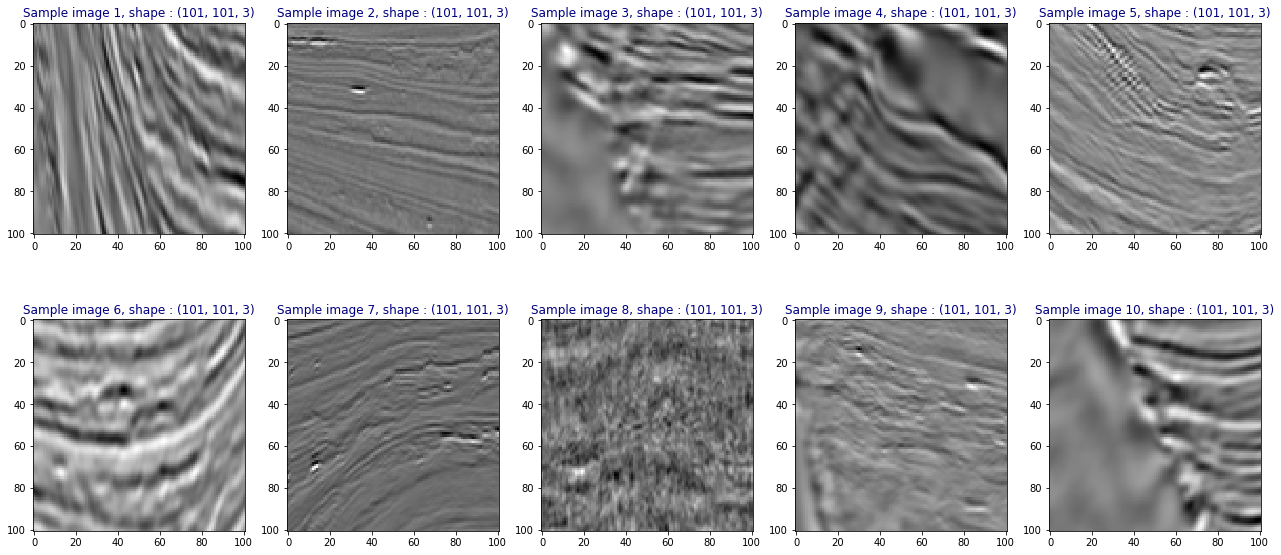

In [0]:
# TGS Salt Identification Challenge 画像サンプル
os.chdir(train_image_path)

# visualize
fig = plt.figure(figsize=(22, 10))

for i, image_path in enumerate(train_images[:10]):
  image = Image.open(image_path)
  image = np.asarray(image)
  
  ax = fig.add_subplot(2, 5, i+1)
  ax.imshow(image)
  ax.set_title("Sample image {0}, shape : {1}".format(i+1, np.asarray(image).shape), color="navy")
  fig.show()

- 画像の形状はサイズ（101, 101)、チャンネル数が3である。

In [0]:
os.chdir(unet_path)
%run -i main.py

/content/drive/My Drive/My Documents/Study/Programming/DIVE INTO CODE/Class/sprint20/unet-master/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/5
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
400/400 [==============================] - 1464s 4s/step - loss: 0.4430 - acc: 0.8017

Epoch 00001: loss improved from inf to 0.44299, saving model to unet_salt.hdf5
Epoch 2/5
400/400 [==============================] - 607s 2s/step - loss: 0.3728 - acc: 0.8655

Epoch 00002: loss improved from 0.44299 to 0.37282, saving model to unet_salt.hdf5
Epoch 3/5
400/400 [==============================] - 606s 2s/step - loss: 0.3567 - acc: 0.8787

Epoch 00003: loss improved from 0.37282 to 0.35668, saving model to unet_salt.hdf5
Epoch 4/5
400/400 [==============================] - 605s 2s/step - loss: 0.3438 - acc: 0.8869

Epoch 00004: loss improved from 0.35668 to 0.34382, saving model to unet_salt.hdf5
Epoch 5/5
400/400 [==============================] - 605s 2s/step - loss: 0.3365 - acc: 0.8923

Epoch 00005: loss improved from 0.34382 to 0.33650, saving model to unet_salt.hdf5
30/30 [=================

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: data/salt/test/0_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
W0712 12:12:06.994536 139699604010880 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: data/salt/test/1_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
W0712 12:12:07.301983 139699604010880 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: data/salt/test/2_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
W0712 12:12:07.652516 139699604010880 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving 

In [0]:
test_path =  '/content/drive/My Drive/My Documents/Study/Programming/DIVE INTO CODE/Class/sprint20/unet-master/data/salt/test'
os.chdir(test_path)

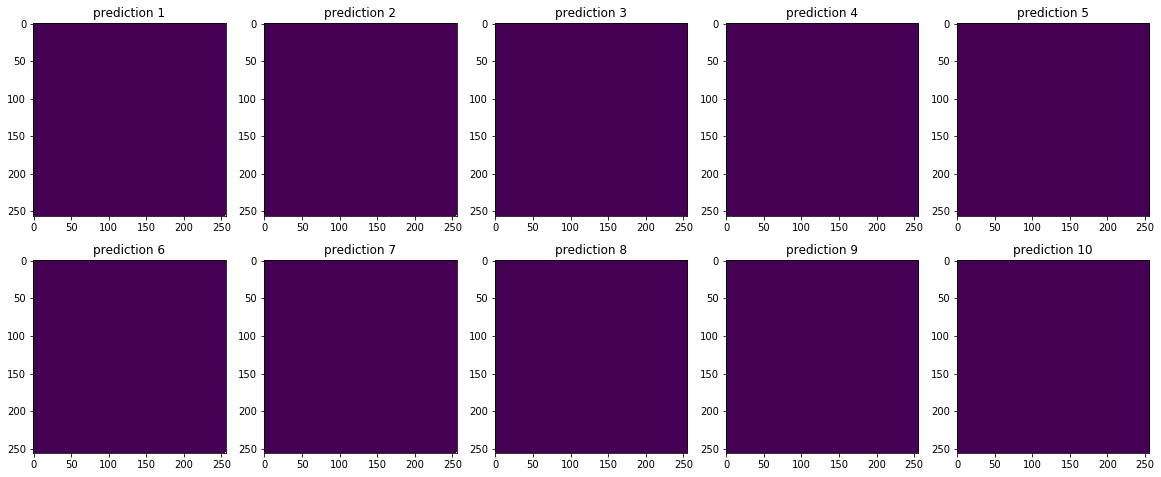

In [0]:
# 予測結果の一覧
pred_list = [i for i in os.listdir() if "predict" in i]

# モデルによる予測結果

fig = plt.figure(figsize=(20, 8))

for i, pred in enumerate(pred_list[:10]):
  image = Image.open(os.path.join(test_path, pred))
  image = np.asarray(image)
  
  ax = fig.add_subplot(2, 5, i+1)
  ax.imshow(image)
  ax.set_title("prediction {}".format(i+1))
  fig.show()

- 時間の制約上、エポック数を５回に抑えたため、境界線が明確には表示されなかった。

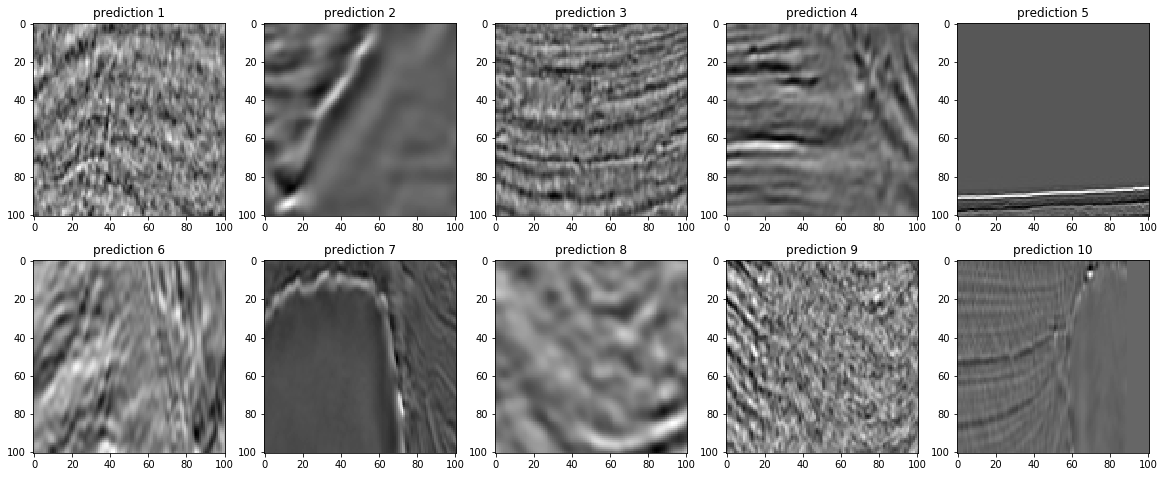

In [0]:
# 正解値の一覧
true_list = [i for i in os.listdir() if "predict" not in i]

# 正解値を表示

fig = plt.figure(figsize=(20, 8))

for i, true in enumerate(true_list[:10]):
  image = Image.open(os.path.join(test_path, true))
  image = np.asarray(image)
  
  ax = fig.add_subplot(2, 5, i+1)
  ax.imshow(image)
  ax.set_title("prediction {}".format(i+1))
  fig.show()

- 以下はコードサンプルとしてgithubに公開されている細胞膜（membrane）の予測結果である。
- 十分にモデルを学習させた場合、同様に塩分を区別する境界線が明示されることが期待される。

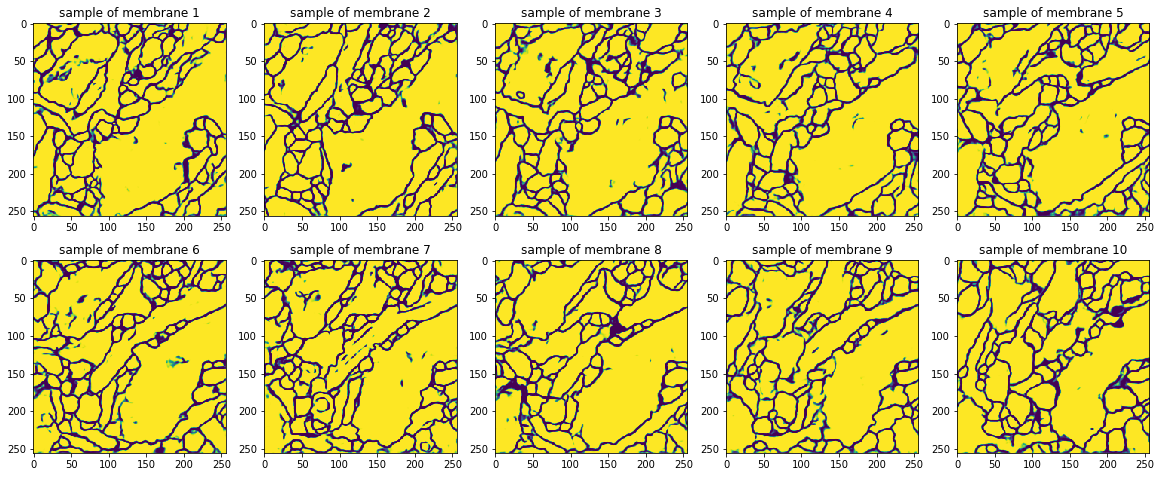

In [0]:
# membrane
os.chdir(os.path.join(unet_path, "data/membrane"))
sample_list = [i for i in os.listdir() if "predict" in i]
sample_list

# visualize
fig = plt.figure(figsize=(20, 8))

for i, pred in enumerate(sample_list[:10]):
  image = Image.open(os.path.join(unet_path, "data/membrane", pred))
  image = np.asarray(image)
  
  ax = fig.add_subplot(2, 5, i+1)
  ax.imshow(image)
  ax.set_title("sample of membrane {}".format(i+1))
  fig.show()

### 【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行う。

### 確認したポイント

1. Architecture
  1. contracting path (ダウンサンプリング)
  2. expansive path（アップサンプリング）：boarder pixel喪失解消のため、ダウンサンプリング時に抽出した特徴量をマージして補填（cropping）している。

2. Training
  - ピクセル単位でソフトマックス関数を用いたクラス分類を行なっている。
  - ソフトマックス関数は以下の通り定義される。（$a_k(x)$：平面$Ω$上の位置$x$のチャンネル$k$における活性化された特徴量、$x$：各ピクセル）
    <div style="text-align:center;">$p_{k}(x) = exp(a_k(x)) / (\sum_{k'=1}^{K}exp(a_{k'}(x)))$</div>
  
  - 損失関数は以下のとおり定義される。($l$:正解ラベル（$1,2,...,K$）、$w$: weight map)
  <div style="text-align:center;">$E = \sum_{x∈Ω}w(x)log(p_{l(x)}(x))$</div>
  
   - つまり、クロスエントロピー誤差は、各ピクセルにおける正解値（1）と$p_{l}(x)$の乖離に対してペナルティを与える形で定義される。

  - 各グランドトゥルースセグメンテーションの重みマップを事前に計算して、学習用データセット内の特定のクラスからのピクセルの異なる頻度を補正し、接触セル間に生じる小さな分離境界をネットワークに学習させる。

    - 重みマップ：$w(x) = w_{c}(x) +  w_{0}*exp(-\frac{(d_1(x)+ d_2(x))^2}{2σ^2})$
    - $w_c$ :  クラス頻度(class friquencies)のバランスを取るための重みマップ（Ω → R）
    - $d_1$ : 最も近いセルとの距離
    - $d_2$ : ２番目に近いセルとの距離
    - $w_0$ : パラメータ（論文の試行では10pixelsを想定）
    - $σ$ : パラメータ（論文の試行では５pixelsを想定）

3. Data Augmentation : 弾性変形（Random elastic deformations）を実施している

4. Morophological operations（形態素演算）：
  - ネットワークにborder pixel（境界線を表現するピクセル）を学習させるために、ピクセル単位で損失を重み付けした上でマッピングする。

5. Per-pixel displacements：画像拡大の際に画質の劣化を防ぐため、Bicubic interpolation（バイキュービック補間法）、つまり周囲16画素の画素値を利用して色を補間している

### 補足

#### 1. Architecture

model.pyファイルの<font color="blue">**unet()メソッド**</font>でネットワークを構築している。

- 事前学習した重みを利用可能（pretrained_weightの初期設定はNone）

- paddingは"same"とすることで、入力と出力を同じサイズに揃えている。

- upsampling時に、mergeレイヤーで"cropping"（畳み込み時に失われたborder pixelの補完）を行なっている。

- 重みの初期化は、論文に記載の通り標準偏差√2/Nのガウス分布（he_normal）を設定している。

- アーキテクチャに該当するコードは以下の通り。

In [0]:
def unet(pretrained_weights = None, input_size = (256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

![U-net](https://cdn.clipkit.co/tenants/86/articles/images/000/000/300/large/65578642-e333-4df7-8dc5-c8651c08e3ae.png?1541215259)

#### 2. Data Augmentation

- data.pyファイルの<font color="blue">**trainGenerator()メソッド**</font>で実行。
  - 実際にはtrainGenerator()メソッド内で<font color="blue">**keras.ImageDataGenerator**</font>を呼び出し、データ投入時にデータ拡張を行なっている。

- 引数は以下の通り設定（その他はデフォルト値）
  - rotation_range：ランダムな回転範囲
  - width_shift_range, height_shift_range：画像の平行移動の範囲
  - shear_range：せん断の範囲
  - zoom_range：ズームの範囲
  - horizontal_flip：左右反転（今回は反転あり）
  - fill_mode：回転や平行移動等の結果、値がないピクセルの色の補完方法（今回は"constant"：最近傍の色で補完）
  
- 該当箇所のコードは以下の通り。

In [0]:
# ImageDataGenerator
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)

In [0]:
def trainGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "grayscale",
                    mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (256,256),seed = 1):
    '''
    can generate image and mask at the same time
    use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
    if you want to visualize the results of generator, set save_to_dir = "your path"
    '''
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)
    train_generator = zip(image_generator, mask_generator)
    for (img,mask) in train_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)

### Take away

1. セグメンテーションに関して、以下の点を理解した。
  - 解くべき問題に対して適切な損失関数を定義すること。
    - 境界線を予測するため、ピクセル単位で正解を判定する必要がある。
    - 加えて、境界線は色で表現されるため、チャンネル単位で正解値を持たせる必要がある。
  - 事前学習した重みを用いない場合、学習に相当な時間をかける必要がある。


2. 論文読解を通じて以下の点を確認すると共に、前処理の重要性を再認識した。
  - 論文中では、分離境界をモデルに学習させるための手法として、各グランドトゥルースセグメンテーションの重みマップ（事前計算）が紹介されていた。
  - 考慮されていなかったが、計算式から、分離境界線からの距離が遠いピクセルほど重みを小さくする（逆に、境界線からの距離が近いピクセルほど重みが大きくする）ことが読み取れ、画像データの前処理方法に関して具体例を調査したい。